In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [3]:
%pip install itables

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



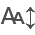

In [4]:
import itables   #rendering iteractive tables in jupyter notebook
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [8]:
df = pd.read_excel("World Energy Consumption.xlsx")

In [9]:
df.shape

(22012, 129)

In [10]:
df.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...               0.0                 NaN   
1                      NaN  ...               0.0                 NaN   
2                      NaN  ...               0.0                 NaN   
3                      NaN  ...               0.0                 NaN   
4                      NaN  ...               0.0                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   NaN               0.0                     NaN   
1                   NaN               0.0                     NaN   
2                   NaN               0.0                     NaN   
3                   NaN               0.0                     NaN   
4                   NaN               0.0                     NaN   

   wind_share_elec  wind_share_energy  
0              0.0                NaN  
1              0.0                NaN  
2              0.0                NaN  
3              0.0                NaN  
4              0.0                NaN  

[5 rows x 129 columns]

# Data Cleaning


In our dataset in the country column, there aren't just countries but so many different political groups, continents, deemed to be countries or special status regions included which we have to find and remove as we our scope in this project is limited to countries only

1. Extracts all unique values in the country columns of the df
2. converts these unique values into a python list for later use

In [11]:
df.country.unique().tolist()

['ASEAN (Ember)',
 'Afghanistan',
 'Africa',
 'Africa (EI)',
 'Africa (Ember)',
 'Africa (Shift)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia & Oceania (EIA)',
 'Asia (Ember)',
 'Asia Pacific (EI)',
 'Asia and Oceania (Shift)',
 'Australia',
 'Australia and New Zealand (EIA)',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS (EI)',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central & South America (EIA)',
 'Central African Republic',
 'Central America (EI)',
 'Central and South America (Shift)',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croa

1. exclude rows  where the country column contains the values from the predifined list.
2. ~ is keeps the rows where the conditions is not true
3. isin() - checks whether the country column value is the list 

purpose:
1. to remove rows containing political group("G10,G7),continents("asia","europe),regions or economic categories("world")

goal:
The goal is to focus the dataset on actual countries for analysis, ensuring consistency and relevance.

In [12]:
df = df[~df.country.isin(["ASEAN (Ember)",'Africa (EI)',"Africa (Ember)","Africa (Shift)","Antarctica","Asia","Asia & Oceania (EIA)","Asia (Ember)",
                             "Asia Pacific (EI)","Asia and Oceania (Shift)","Australia and New Zealand (EIA)","CIS (EI)",
                             "Central & South America (EIA)","Central America (EI)","Central and South America (Shift)",
                            "EU28 (Shift)","East Germany (EIA)","East Timor","Eastern Africa (EI)",
                            "Eurasia (EIA)","Eurasia (Shift)","Europe","Europe (EI)""Europe (Ember)","Europe (Shift)","European Union (27)",
                            "European Union (EIA)","Falkland Islands","Faroe Islands","French Guiana","French Polynesia","G20 (Ember)",
                             "G7 (Ember)","Hawaiian Trade Zone (EIA)","High-income countries","IEO - Africa (EIA)","IEO - Middle East (EIA)",
                             "IEO OECD - Europe (EIA)","Latin America and Caribbean (Ember)","Low-income countries", "Lower-middle-income countries",
                             "Mexico, Chile, and other OECD Americas (EIA)","Micronesia (country)","Middle Africa (EI)","Middle East (EI)",
                             "Middle East (EIA)","Middle East (Ember)","Middle East (Shift)","Netherlands Antilles","New Caledonia","Non-OECD (EI)",
                             "Non-OECD (EIA)","Non-OPEC (EI)","Non-OPEC (EIA)","North America","North America (EI)","North America (Ember)",
                             "North America (Shift)","OECD (EI)","OECD (EIA)","OECD (Ember)","OECD (Shift)","OECD - Asia And Oceania (EIA)",
                             "OECD - Europe (EIA)","OECD - North America (EIA)","OPEC (EI)","OPEC (EIA)","OPEC (Shift)","OPEC - Africa (EIA)",
                             "OPEC - South America (EIA)","Oceania","Oceania (Ember)","Other Non-OECD - America (EIA)","Other Non-OECD - Asia (EIA)",
                             "Other Non-OECD - Europe and Eurasia (EIA)","Persian Gulf (EIA)","Persian Gulf (Shift)","Reunion","Saint Helena",
                             "Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","Sao Tome and Principe",
                             "South America","South Korea and other OECD Asia (EIA)","South Sudan","South and Central America (EI)","U.S. Pacific Islands (EIA)",
                             "U.S. Territories (EIA)","USSR","United States Pacific Islands (Shift)","United States Territories (Shift)",
                             "Upper-middle-income countries","Wake Island (EIA)","Wake Island (Shift)","West Germany (EIA)","Western Africa (EI)",
                             "Western Sahara","World",'Africa'])]

In [13]:
df.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
23  Afghanistan  1900      AFG   4707744.0  NaN                      NaN   
24  Afghanistan  1901      AFG   4751177.0  NaN                      NaN   
25  Afghanistan  1902      AFG   4802500.0  NaN                      NaN   
26  Afghanistan  1903      AFG   4861833.0  NaN                      NaN   
27  Afghanistan  1904      AFG   4921891.0  NaN                      NaN   

    biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
23                      NaN                      NaN                  NaN   
24                      NaN                      NaN                  NaN   
25                      NaN                      NaN                  NaN   
26                      NaN                      NaN                  NaN   
27                      NaN                      NaN                  NaN   

    biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
23                      NaN  ...               NaN                 NaN   
24                      NaN  ...               NaN                 NaN   
25                      NaN  ...               NaN                 NaN   
26                      NaN  ...               NaN                 NaN   
27                      NaN  ...               NaN                 NaN   

    wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
23                   NaN                   NaN               NaN   
24                   NaN                   NaN               NaN   
25                   NaN                   NaN               NaN   
26                   NaN                   NaN               NaN   
27                   NaN                   NaN               NaN   

    wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
23                   NaN               NaN                     NaN   
24                   NaN               NaN                     NaN   
25                   NaN               NaN                     NaN   
26                   NaN               NaN                     NaN   
27                   NaN               NaN                     NaN   

    wind_share_elec  wind_share_energy  
23              NaN                NaN  
24              NaN                NaN  
25              NaN                NaN  
26              NaN                NaN  
27              NaN                NaN  

[5 rows x 129 columns]

In [14]:
df.shape

(16113, 129)

The International Energy Agency (IEA) is a Paris-based autonomous intergovernmental organisation, established in 1974, that provides policy recommendations, analysis and data on the global energy sector. The 31 member countries and 13 association countries of the IEA represent 75% of global energy demand.

The core activity of the IEA is providing policy advice to its member states and Associated countries to support their energy security and advance their transition to clean energy.

In [15]:
# While data from the year 1900 is available, it would be more sensible to focus our analysis from 1974 onwards 
# to assess the influence of such regulatory bodies and its members on global energy security.

df = df[df["year"]>=1974]

In [17]:
#extract numeric column from the dataset

df.select_dtypes(exclude='object').columns.to_list()   

['year',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
 'gas_

In [18]:
#print categorical column

df.select_dtypes(include='object').columns.to_list()

['country', 'iso_code']

In [19]:
df.describe().T  # T -  Transposes the dataframe or switching rows,column

count          mean           std           min  \
year                     9067.0  1.999504e+03  1.329782e+01  1.974000e+03   
population               8995.0  3.200356e+07  1.223924e+08  1.833000e+03   
gdp                      6733.0  3.924134e+11  1.326879e+12  1.642060e+08   
biofuel_cons_change_pct  1077.0  6.407671e+01  3.451642e+02 -1.000000e+02   
biofuel_cons_change_twh  1687.0  8.291974e-01  4.378498e+00 -3.754900e+01   
...                         ...           ...           ...           ...   
wind_elec_per_capita     5927.0  5.942299e+01  2.384450e+02  0.000000e+00   
wind_electricity         5999.0  4.277413e+00  3.322602e+01  0.000000e+00   
wind_energy_per_capita   3244.0  2.544347e+02  7.959618e+02  0.000000e+00   
wind_share_elec          5505.0  1.309761e+00  4.336857e+00  0.000000e+00   
wind_share_energy        2735.0  7.958121e-01  2.219104e+00  0.000000e+00   

                                  25%           50%           75%  \
year                     1.988000e+03  2.000000e+03  2.011000e+03   
population               1.322364e+06  6.571862e+06  2.073470e+07   
gdp                      1.631173e+10  5.495151e+10  2.357632e+11   
biofuel_cons_change_pct -1.386000e+00  8.329000e+00  3.090200e+01   
biofuel_cons_change_twh  0.000000e+00  0.000000e+00  2.880000e-01   
...                               ...           ...           ...   
wind_elec_per_capita     0.000000e+00  0.000000e+00  1.851000e+00   
wind_electricity         0.000000e+00  0.000000e+00  4.000000e-02   
wind_energy_per_capita   0.000000e+00  9.100000e-02  5.418625e+01   
wind_share_elec          0.000000e+00  0.000000e+00  1.290000e-01   
wind_share_energy        0.000000e+00  5.000000e-03  3.520000e-01   

                                  max  
year                     2.022000e+03  
population               1.425894e+09  
gdp                      1.815162e+13  
biofuel_cons_change_pct  5.659328e+03  
biofuel_cons_change_twh  6.087500e+01  
...                               ...  
wind_elec_per_capita     3.219852e+03  
wind_electricity         8.005200e+02  
wind_energy_per_capita   8.422012e+03  
wind_share_elec          5.684000e+01  
wind_share_energy        2.615700e+01  

[127 rows x 8 columns]

In [20]:
np.round(df.isna().sum()*100/df.shape[0])

country                    0.0
year                       0.0
iso_code                   2.0
population                 1.0
gdp                       26.0
                          ... 
wind_elec_per_capita      35.0
wind_electricity          34.0
wind_energy_per_capita    64.0
wind_share_elec           39.0
wind_share_energy         70.0
Length: 129, dtype: float64

In [26]:
def plot_world_map_with_slider(column_name):
    #initialize the figure
    fig = go.Figure()  #create empty plotly figure object, which will hold the map and slider
    
    #add trace for each year
    for year in range(1974, 2023):    #iterate over years from 1974 to 2022
        filtered_df = df[df['year'] == year]   #where the year match current loop iteration
        trace = go.Choropleth(
            locations=filtered_df['country'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  #color gradient 
            colorbar=dict(title=column_name),  #adds a legend to explain the color scale
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False     # initally set false so only the first year is shown by default
        )
        fig.add_trace(trace)  

    fig.data[0].visible = True   # make the first trace visible
    steps = []  # hold configiration for each slider step
    for i in range(len(fig.data)):   #for each year map
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  #initially hide all traces 
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(1974 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name.upper()} MAP',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

In [27]:
column_name = 'gdp'
plot_world_map_with_slider(column_name)

In [28]:
column_name = 'population'
plot_world_map_with_slider(column_name)

Using Simple Imputer to fill missing values with 0 as filling with zero makes sense since it is possible that these values accounted to zero only or were not captured or available at the time of data collection

In [29]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'constant',fill_value= 0)

In [30]:
df.iloc[:,5:] = si.fit_transform(df.iloc[:,5:])

# After replacing the missing values in the columns with zeros (excluding population, iso_code, and GDP columns), we have transformed our dataset into one that is more easily interpreted by the machine learning algorithm.

### GDP is something we cannot make zero, hence I think of a better alternative to replace those Null values

1. I am using Exponential Weighted Averages and replacing the original values where NULL is present with these calculated values
2. Although since GDP varies country-wise, we can only impute or replace missing values where some small set of values are missing for a particular country.
3. Hence I am first of all removing all those countries which do not have any GDP data, it is crucial as GDP values will serve larger purpose later on as well

In [31]:
df[df['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0   
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
142                        0.0                      0.0                  0.0   
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
142                      0.000  ...             4.673                 0.0   
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
142                     0.0                   0.0               0.0   
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
142                     0.0               0.0                     0.0   
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [32]:
np.round(df.isna().sum())

country                      0
year                         0
iso_code                   146
population                  72
gdp                       2334
                          ... 
wind_elec_per_capita         0
wind_electricity             0
wind_energy_per_capita       0
wind_share_elec              0
wind_share_energy            0
Length: 129, dtype: int64

In [33]:
zero_gdp_countries = df.groupby(['country'])['gdp'].sum().reset_index()
countries_with_no_gdp_data = zero_gdp_countries[zero_gdp_countries['gdp'] == 0]['country'].tolist()
data = df[~df['country'].isin(countries_with_no_gdp_data)]

In [34]:
df[df['population'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
6694     Europe (EI)  1974      NaN         NaN  NaN                      0.0   
6695     Europe (EI)  1975      NaN         NaN  NaN                      0.0   
6696     Europe (EI)  1976      NaN         NaN  NaN                      0.0   
6697     Europe (EI)  1977      NaN         NaN  NaN                      0.0   
6698     Europe (EI)  1978      NaN         NaN  NaN                      0.0   
...              ...   ...      ...         ...  ...                      ...   
6761  Europe (Ember)  2018      NaN         NaN  NaN                      0.0   
6762  Europe (Ember)  2019      NaN         NaN  NaN                      0.0   
6763  Europe (Ember)  2020      NaN         NaN  NaN                      0.0   
6764  Europe (Ember)  2021      NaN         NaN  NaN                      0.0   
6765  Europe (Ember)  2022      NaN         NaN  NaN                      0.0   

      biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
6694                      0.0                      0.0                  0.0   
6695                      0.0                      0.0                  0.0   
6696                      0.0                      0.0                  0.0   
6697                      0.0                      0.0                  0.0   
6698                      0.0                      0.0                  0.0   
...                       ...                      ...                  ...   
6761                      0.0                      0.0                  0.0   
6762                      0.0                      0.0                  0.0   
6763                      0.0                      0.0                  0.0   
6764                      0.0                      0.0                  0.0   
6765                      0.0                      0.0                  0.0   

      biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
6694                      0.0  ...             0.000                 0.0   
6695                      0.0  ...             0.000                 0.0   
6696                      0.0  ...             0.000                 0.0   
6697                      0.0  ...             0.000                 0.0   
6698                      0.0  ...             0.000                 0.0   
...                       ...  ...               ...                 ...   
6761                      0.0  ...             2.697                 0.0   
6762                      0.0  ...             3.021                 0.0   
6763                      0.0  ...             3.668                 0.0   
6764                      0.0  ...             3.917                 0.0   
6765                      0.0  ...             4.859                 0.0   

      wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
6694                   0.0                 0.000             0.000   
6695                   0.0                 0.000             0.000   
6696                   0.0                 0.000             0.000   
6697                   0.0                 0.000             0.000   
6698                   0.0                 0.009             0.009   
...                    ...                   ...               ...   
6761                   0.0                 0.000             0.000   
6762                   0.0                 0.000             0.000   
6763                   0.0                 0.000             0.000   
6764                   0.0                 0.000             0.000   
6765                   0.0                 0.000             0.000   

      wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
6694                   0.0             0.000                     0.0   
6695                   0.0             0.000                     0.0   
6696                   0.0             0.000                     0.0   
6697                   0.0             0.000     

It seems like, when we removed countried with no GDP data from our dataset, it also helped removed entried where population values were Null

In [35]:
df[df['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0   
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
142                        0.0                      0.0                  0.0   
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
142                      0.000  ...             4.673                 0.0   
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
142                     0.0                   0.0               0.0   
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
142                     0.0               0.0                     0.0   
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [ ]:
# Convert GDP column to a DataFrame
gdp = data['gdp'].to_frame()

# Calculate exponential moving average with a span of 10
data['gdp_exp_moving_avg'] = gdp.ewm(span=10).mean()

# Display the new column containing the exponential moving average of GDP
data['gdp_exp_moving_avg']